# Importing and gathering data


In [3]:
import pandas as pd
df =pd.read_csv('fish.csv')

In [4]:
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# Data Preprocessing

In [5]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
df.isnull().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [7]:
x = df.iloc[:, 1:]
y = df.loc[:, 'Species']


# Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Splitting data

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# Model Selection

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model



# Model fitting

In [12]:
clf.fit(x_train, y_train)

LogisticRegression()

# Model Prediction

In [13]:
y_pred = clf.predict(x_test)

# Finding Accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 78.12%


Text(0.5, 1.0, 'Confusion Matrix')

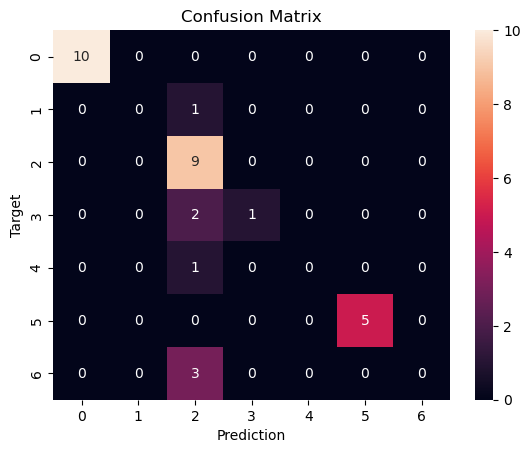

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

